# 무선청소기 모델별 비교 분석

### 6-34 데이터 불러오기

In [1]:
import pandas as pd
danawa_data = pd.read_excel('./3_2_danawa_data_fial.xlsx')
danawa_data.info()
danawa_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    250 non-null    object 
 1   회사명     250 non-null    object 
 2   제품      250 non-null    object 
 3   가격      250 non-null    int64  
 4   사용시간    230 non-null    float64
 5   흡입력     110 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.8+ KB


,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,대웅모닝컴,DWVC-AC800KP,24020,NaN,NaN
1,핸디/스틱청소기,삼성전자,VC-PS85,88990,15.0,NaN
2,핸디/스틱청소기,한샘,스톰건 V12 VC-R201,266800,35.0,200.0
3,핸디/스틱청소기,DIBEA,에이스 프로,79900,45.0,90.0
4,핸디/스틱청소기,다이슨,V7 트리거 프로,417690,30.0,100.0


### 6-35 흡입력 기준 정렬

In [2]:
top_list = danawa_data.sort_values(['흡입력'],ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
2,핸디/스틱청소기,한샘,스톰건 V12 VC-R201,266800,35.0,200.0
152,핸디/스틱청소기,한샘,스톰건 V12 VC-R201,266800,35.0,200.0
64,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
77,핸디/스틱청소기,한샘,스톰건 V12 VC-R201,266800,35.0,200.0
89,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0


### 6-36 사용시간 기준 정렬

In [3]:
top_list = danawa_data.sort_values(['사용시간'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
214,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
139,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
114,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
89,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
14,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0


### 6-37 흡입력, 사용시간을 기준으로 정렬

In [4]:
top_list = danawa_data.sort_values(['사용시간', '흡입력'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
14,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
39,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
64,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
89,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0
114,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1071350,120.0,200.0


### 6-38 평균값 정리

In [5]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print('가격 평균값', price_mean_value)
print('흡입력 평균값', suction_mean_value)
print('사용시간 평균값', use_time_mean_value)

가격 평균값 175910.84
흡입력 평균값 135.45454545454547
사용시간 평균값 35.34782608695652


### 6-39 가성비 좋은 제품 탐색

In [6]:
condition_data = danawa_data[
    (danawa_data['가격'] <= price_mean_value) &
    (danawa_data['흡입력'] >= suction_mean_value) &
    (danawa_data['사용시간'] >= use_time_mean_value)
]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력


# 데이터 시각화

### 6-40 라이브러리 임포트 및 한글 글꼴 설정

In [7]:
# 예제 6-40 라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 
# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우, macOS에 대해 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline

### 6-41 결측값 없애기

In [8]:
chart_data = danawa_data.dropna(axis=0)
len(chart_data)

110

### 6-42 흡입력, 사용시간의 최대값/ 최소값 정리
- 흡입력, 사용시간 최대, 최소

In [9]:
suction_max_value= chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

### 6-43 청소기 성능 시각화

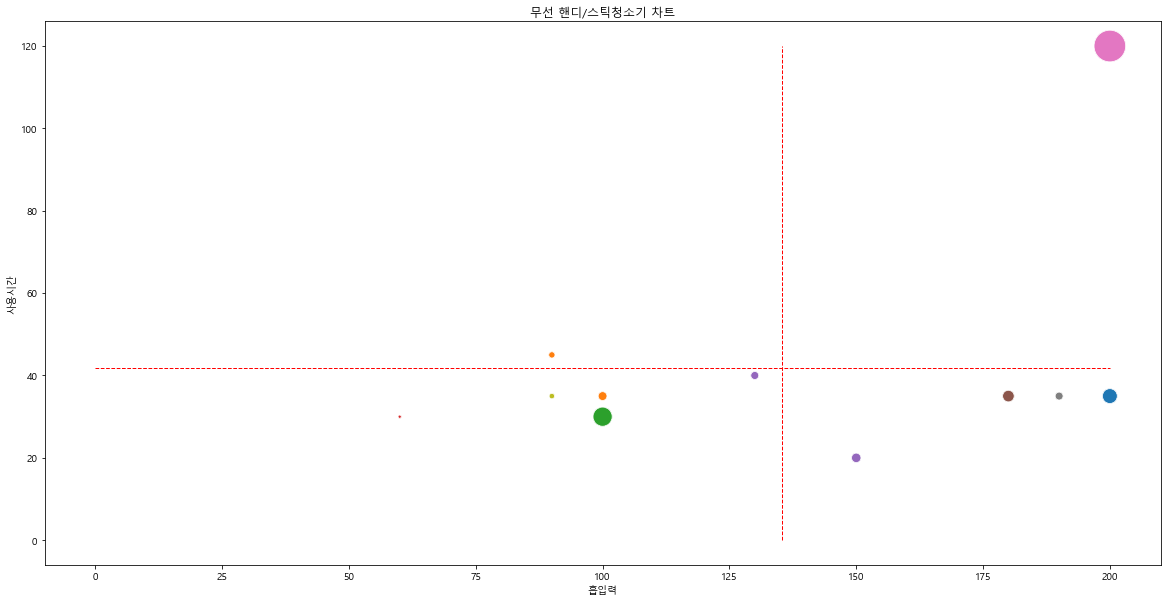

In [10]:
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스틱청소기 차트')
sns.scatterplot(x='흡입력', y='사용시간', size = '가격', hue = chart_data['회사명'],
               data = chart_data, sizes = (10,1000), legend = False)
plt.plot([0, suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--',
        lw = 1)

plt.plot([suction_mean_value, suction_mean_value],
        [0, use_time_max_value],
        'r--',
        lw=1)

plt.show()

# 인기 제품의 데이터 시각화

### 6-44 인기 제품 선택

In [11]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

### 6-45 흡입력, 사용시간의 최댓값/ 최소값 정리
- 흡입력, 사용시간의 최대값, 최소값 구하기

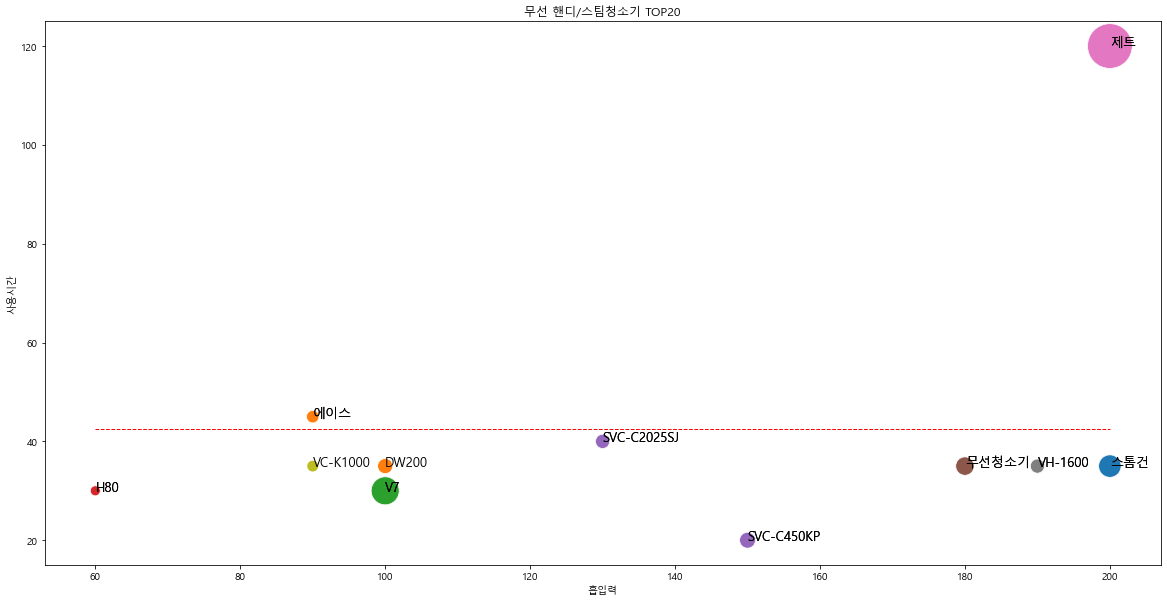

In [15]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()
plt.figure(figsize=(20,10))
plt.title('무선 핸디/스팀청소기 TOP20')
sns.scatterplot(x='흡입력',
               y = '사용시간',
               size = '가격',
                hue=chart_data_selected['회사명'],
                data = chart_data_selected, sizes =(100,2000),
                legend = False)

plt.plot([60, suction_max_value],
        [use_time_mean_value, use_time_mean_value],
        'r--',
        lw=1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x,y,s,size = 13)
    
plt.show()